## Pandas

## Apply, applymap, map

In [1]:
import pandas as pd
import numpy as np

In [12]:
df = pd.DataFrame({'A': [1, 2, 3, 4],
                   'B': [10, 20, 30, 40],
                   'C': [20, 40, 60, 80]
                   },
                  index=['Linha 1', 'Linha 2', 'Linha 3', 'Linha 4'])

In [3]:
df

,A,B,C
Linha 1,1,10,20
Linha 2,2,20,40
Linha 3,3,30,60
Linha 4,4,40,80


O `apply` é usado para aplicar uma função ao longo de um eixo do Dataframe ou em valores de Série

In [6]:
def custom_sum(row):
    return row.sum()

df['D'] = df.apply(custom_sum, axis=1)
# df['D'] = df.apply(lambda row: row.sum(), axis=1)
df

,A,B,C,D
Linha 1,1,10,20,62
Linha 2,2,20,40,124
Linha 3,3,30,60,186
Linha 4,4,40,80,248


![Screenshot 2024-01-16 at 11.14.27.png](<attachment:Screenshot 2024-01-16 at 11.14.27.png>)
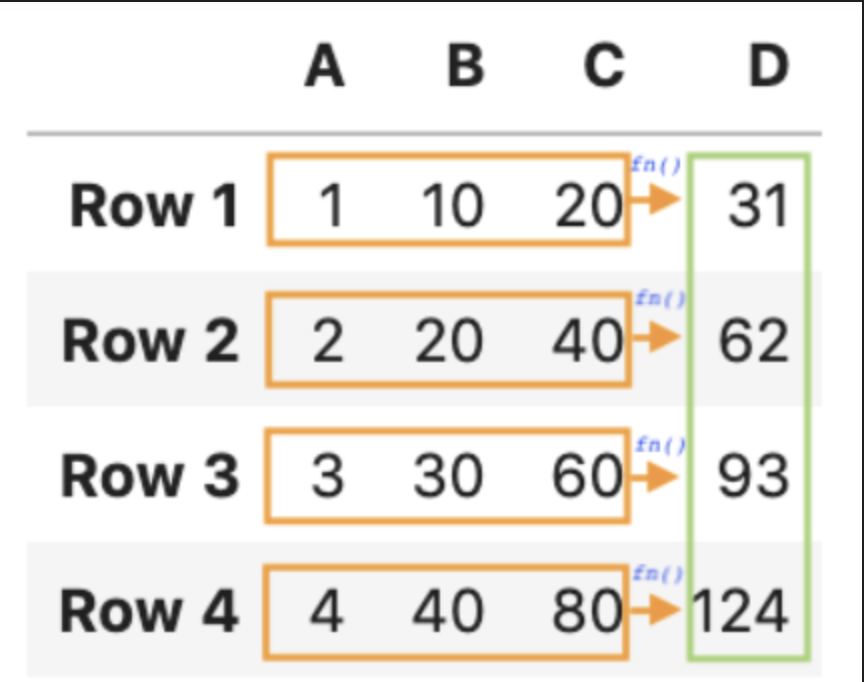

In [7]:
df.loc['Linha 5'] = df.apply(custom_sum, axis= 0)
df

,A,B,C,D
Linha 1,1,10,20,62
Linha 2,2,20,40,124
Linha 3,3,30,60,186
Linha 4,4,40,80,248
Linha 5,10,100,200,620


In [8]:
def multiply_by_2(val):
    return val * 2

df['E'] = df['C'].apply(multiply_by_2)
df

,A,B,C,D,E
Linha 1,20,10,20,62,40
Linha 2,40,20,40,124,80
Linha 3,60,30,60,186,120
Linha 4,80,40,80,248,160
Linha 5,200,100,200,620,400


![Screenshot 2024-01-16 at 11.15.13.png](<attachment:Screenshot 2024-01-16 at 11.15.13.png>)
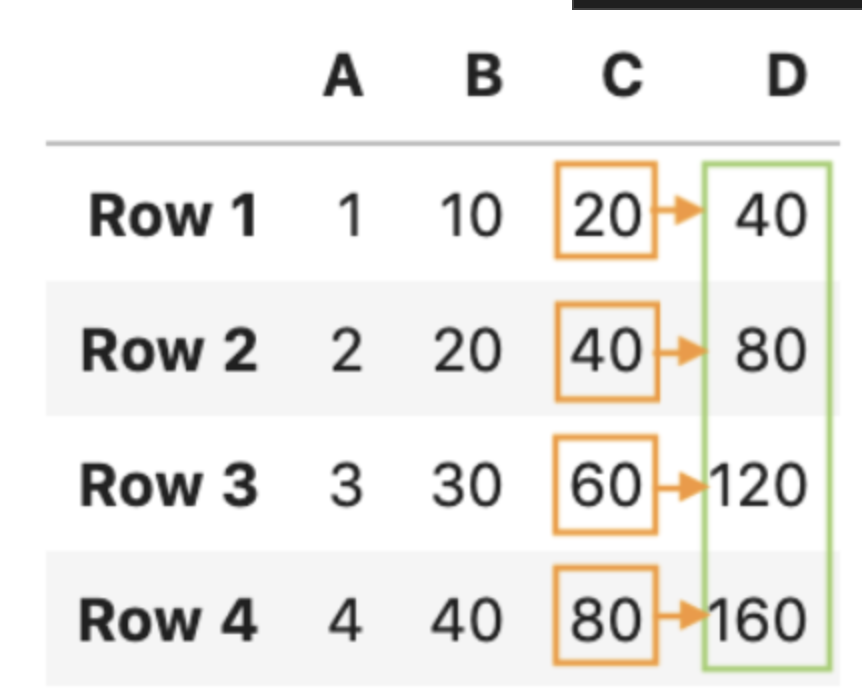

O `applymap` só está disponível no Dataframe e é usado para operações de elemento a elemento em todo o DataFrame

In [13]:
df

,A,B,C
Linha 1,1,10,20
Linha 2,2,20,40
Linha 3,3,30,60
Linha 4,4,40,80


In [14]:
df.applymap(np.square)

/var/folders/mw/d2mf9qf96wjbymmjrcfvw0rr0000gn/T/ipykernel_86933/2297963070.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(np.square)


,A,B,C
Linha 1,1,100,400
Linha 2,4,400,1600
Linha 3,9,900,3600
Linha 4,16,1600,6400


O `map` só está disponível em séries e é usado para substituir cada valor em uma série por outro valor

In [16]:
s = pd.Series(['gato', 'cachorro', np.nan, 'coelho'])
s

0        gato
1    cachorro
2         NaN
3      coelho
dtype: object

In [17]:
s.map({'gato': 'gatinho', 'cachorro': 'cachorrinho', 'coelho': 'coelhinho'})

0        gatinho
1    cachorrinho
2            NaN
3      coelhinho
dtype: object

----

## Dataframe com linhas do tipo objeto (string)

In [18]:
df = pd.DataFrame(
    {
        "email": [
            "jose@email.com",
            "joao@email.com",
            "maria@email.com",
            "joana@email.com",
        ],
        "nome": ["Jose", "Joao", "Maria", "Joana"],
        "idade": [20, 40, 60, 30],
        "telefone": ["99999-1111", "99999-2222", "99999-3333", "99999-4444"],
    }
)

In [19]:
df

,email,nome,idade,telefone
0,jose@email.com,Jose,20,99999-1111
1,joao@email.com,Joao,40,99999-2222
2,maria@email.com,Maria,60,99999-3333
3,joana@email.com,Joana,30,99999-4444


In [22]:
df['nome_upper'] = df['nome'].str.upper()
df

,email,nome,idade,telefone,nome_upper
0,jose@email.com,Jose,20,99999-1111,JOSE
1,joao@email.com,Joao,40,99999-2222,JOAO
2,maria@email.com,Maria,60,99999-3333,MARIA
3,joana@email.com,Joana,30,99999-4444,JOANA


In [37]:
df['nome'].str.lower()

0     Jose
1     Joao
2    Maria
3    Joana
Name: nome, dtype: object

In [36]:
df['qt_caracteres_nome']= df['nome'].str.len()
df

,email,nome,idade,telefone,nome_upper,qt_caracteres_nome
0,jose@email.com,Jose,20,99999-1111,JOSE,4
1,joao@email.com,Joao,40,99999-2222,JOAO,4
2,maria@email.com,Maria,60,99999-3333,MARIA,5
3,joana@email.com,Joana,30,99999-4444,JOANA,5


In [40]:
#trocar maria por mariana
df['upper_upper'] = df['nome_upper'].str.replace('MARIA','MARIANA')
df

,email,nome,idade,telefone,nome_upper,qt_caracteres_nome,upper_upper
0,jose@email.com,Jose,20,99999-1111,JOSE,4,JOSE
1,joao@email.com,Joao,40,99999-2222,JOAO,4,JOAO
2,maria@email.com,Maria,60,99999-3333,MARIA,5,MARIANA
3,joana@email.com,Joana,30,99999-4444,JOANA,5,JOANA


In [42]:
df['telefone'].str.strip()

0    99999-1111
1    99999-2222
2    99999-3333
3    99999-4444
Name: telefone, dtype: object

In [44]:
df['nome'].str[0:2]

0    Jo
1    Jo
2    Ma
3    Jo
Name: nome, dtype: object

In [45]:
df['telefone'].str[-4:]

0    1111
1    2222
2    3333
3    4444
Name: telefone, dtype: object

In [46]:
# Tentando transformar a coluna em númerica
pd.to_numeric(df.telefone)


ValueError: Unable to parse string "99999-1111" at position 0

In [47]:
df

,email,nome,idade,telefone,nome_upper,qt_caracteres_nome,upper_upper
0,jose@email.com,Jose,20,99999-1111,JOSE,4,JOSE
1,joao@email.com,Joao,40,99999-2222,JOAO,4,JOAO
2,maria@email.com,Maria,60,99999-3333,MARIA,5,MARIANA
3,joana@email.com,Joana,30,99999-4444,JOANA,5,JOANA


In [48]:
# exemplo 1 
df['telefone'].str.split('-')

0    [99999, 1111]
1    [99999, 2222]
2    [99999, 3333]
3    [99999, 4444]
Name: telefone, dtype: object

In [49]:
df['telefone'].str.split('-', expand=True)

,0,1
0,99999,1111
1,99999,2222
2,99999,3333
3,99999,4444


In [50]:
# exemplo 2
df['telefone_ajust'] = df['telefone'].str.replace('-', '')
df

,email,nome,idade,telefone,nome_upper,qt_caracteres_nome,upper_upper,telefone_ajust
0,jose@email.com,Jose,20,99999-1111,JOSE,4,JOSE,999991111
1,joao@email.com,Joao,40,99999-2222,JOAO,4,JOAO,999992222
2,maria@email.com,Maria,60,99999-3333,MARIA,5,MARIANA,999993333
3,joana@email.com,Joana,30,99999-4444,JOANA,5,JOANA,999994444


In [51]:
pd.to_numeric(df['telefone_ajust'])

0    999991111
1    999992222
2    999993333
3    999994444
Name: telefone_ajust, dtype: int64

In [61]:
df[['nomedoemail', 'dominiodoemail']] = df['email'].str.split('@', expand=True)
df

,email,nome,idade,telefone,nome_upper,qt_caracteres_nome,upper_upper,telefone_ajust,nomedoemail,dominiodoemail
0,jose@email.com,Jose,20,99999-1111,JOSE,4,JOSE,999991111,jose,email.com
1,joao@email.com,Joao,40,99999-2222,JOAO,4,JOAO,999992222,joao,email.com
2,maria@email.com,Maria,60,99999-3333,MARIA,5,MARIANA,999993333,maria,email.com
3,joana@email.com,Joana,30,99999-4444,JOANA,5,JOANA,999994444,joana,email.com


In [65]:
# Forma 'errada'
df['teste']=df['email'].str.split('@')[:]
df

,email,nome,idade,telefone,nome_upper,qt_caracteres_nome,upper_upper,telefone_ajust,nomedoemail,dominiodoemail,teste
0,jose@email.com,Jose,20,99999-1111,JOSE,4,JOSE,999991111,jose,email.com,"[jose, email.com]"
1,joao@email.com,Joao,40,99999-2222,JOAO,4,JOAO,999992222,joao,email.com,"[joao, email.com]"
2,maria@email.com,Maria,60,99999-3333,MARIA,5,MARIANA,999993333,maria,email.com,"[maria, email.com]"
3,joana@email.com,Joana,30,99999-4444,JOANA,5,JOANA,999994444,joana,email.com,"[joana, email.com]"


In [ ]:
#
# def pegar_lista(row):
#     a=row[0]
#     b=row[1]
#     return a,b

# df[['andre', 'filipe']] = df['teste'].apply()

---------------

## Lendo arquivos

In [85]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.read_csv?

In [89]:
df = pd.read_csv('../dados/btc-market-price.csv')

In [90]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


O arquivo CSV que estamos lendo possui apenas duas colunas: `timestamp` e `price`. Não possui cabeçalho, contém espaços em branco e possui valores separados por vírgulas. O pandas atribuiu automaticamente a primeira linha de dados como cabeçalhos, o que é incorreto. Podemos sobrescrever esse comportamento com o parâmetro `header`:

In [92]:
df = pd.read_csv('../dados/btc-market-price.csv', header = None)
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


Podemos então definir os nomes de cada coluna explicitamente definindo o atributo `df.columns`:

In [93]:
df.columns = ['Timestamp', 'Price']

In [95]:
df.shape

(365, 2)

In [97]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [98]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


O tipo da coluna `Price` foi interpretado corretamente como `float`, mas o `Timestamp` foi interpretado como uma string regular (`object` na notação pandas):

In [100]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

Podemos realizar uma operação vetorizada para analisar todos os valores de timestamp de data/hora como objetos `Datetime`:

In [101]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [102]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])

In [107]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [108]:
df.set_index('Timestamp', inplace=True)

O timestamp se parece muito com o índice deste `DataFrame`: `date > price`. Podemos alterar o ID autoincremental gerado pelo pandas e usar a coluna `Timestamp DS` como índice:

In [110]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

## Juntando tudo

E agora, finalmente chegamos à versão final desejada do `DataFrame` analisada em nosso arquivo CSV. As etapas foram:

In [111]:
df = pd.read_csv('../dados/btc-market-price.csv', header= None)
df.columns=['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [112]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


**Deveria haver uma maneira melhor**. E tem 😎. E geralmente existe, explicitamente com todas essas tarefas repetitivas com pandas.

A função `read_csv` é extremamente poderosa e você pode especificar muitos mais parâmetros no momento da importação. Podemos obter os mesmos resultados com apenas uma linha fazendo:

In [113]:
df = pd.read_csv('../dados/btc-market-price.csv',
                 header=None,
                names=['Timestamp', 'Price'],
                index_col=0,
                parse_dates=True
                 )

## Noções básicas de plotagem

`pandas` integra-se ao Matplotlib e criar um gráfico é tão simples quanto:

<Axes: xlabel='Timestamp'>

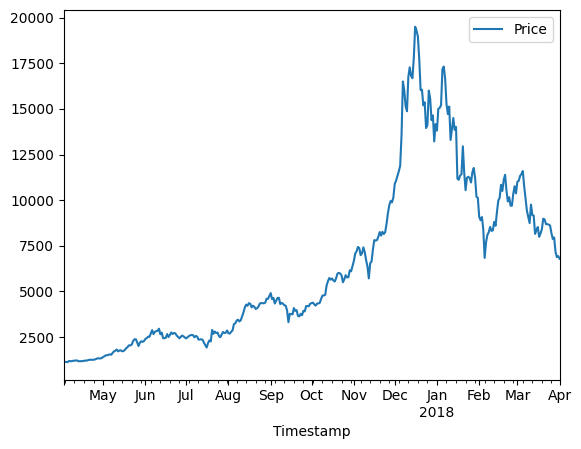

In [117]:
df.plot()

Nos bastidores, ele está usando a interface `matplotlib.pyplot`. Podemos criar um gráfico semelhante com a função `plt.plot()`:

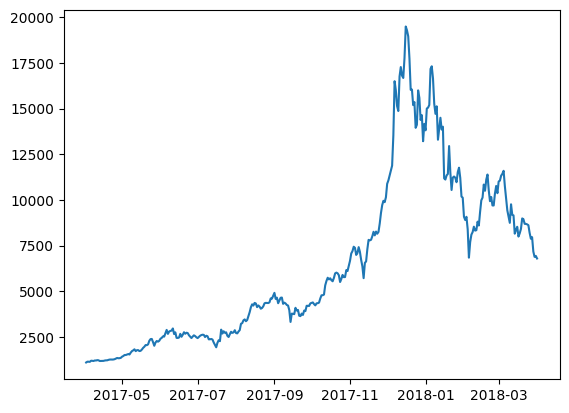

In [118]:
plt.plot(df.index, df['Price'])

`plt.plot()` aceita muitos parâmetros, mas os dois primeiros são os mais importantes: os valores dos eixos `X` e `Y`. Outro exemplo:

In [119]:
x = np.arange(-10,11)

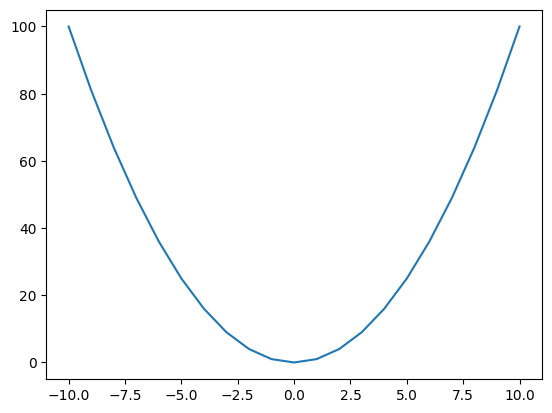

In [120]:
plt.plot(x, x ** 2)

Estamos usando a API global do `matplotlib`, que é horrível, mas é a mais popular. Aprenderemos mais tarde como usar a API _OOP_ que tornará nosso trabalho muito mais fácil.

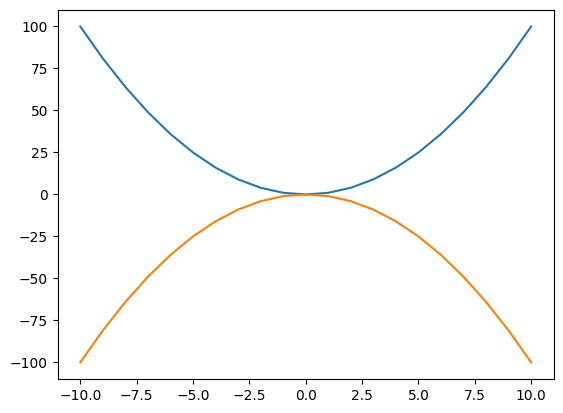

In [123]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))


Cada função `plt` altera o estado global. Se você deseja definir as configurações do seu gráfico, você pode usar a função `plt.figure`. Outros como `plt.title` continuam alterando o enredo global:

Text(0.5, 1.0, 'Plot Lindão')

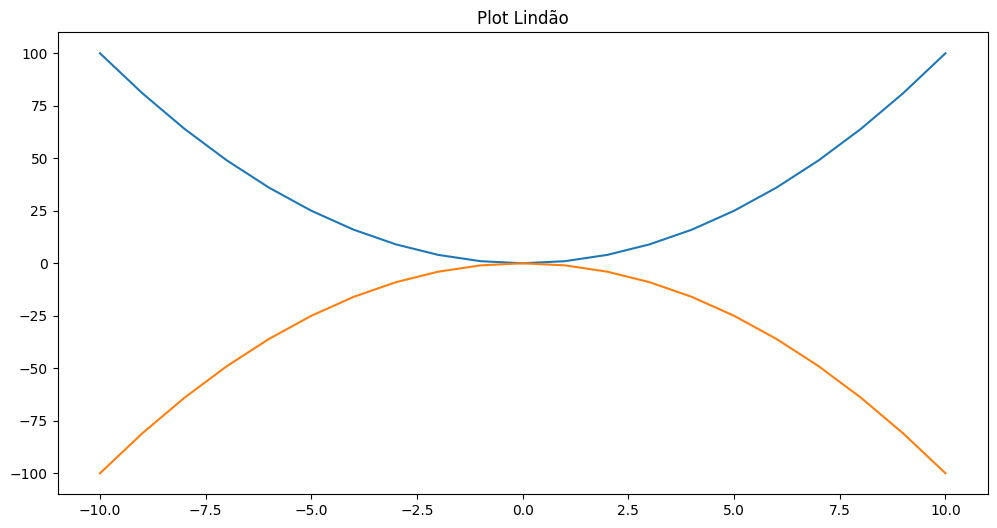

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('Plot Lindão')

Alguns dos argumentos em `plt.figure` e `plt.plot` estão disponíveis na interface `plot` do pandas:

<Axes: title={'center': 'Bitcoin price 2017-2018'}, xlabel='Timestamp'>

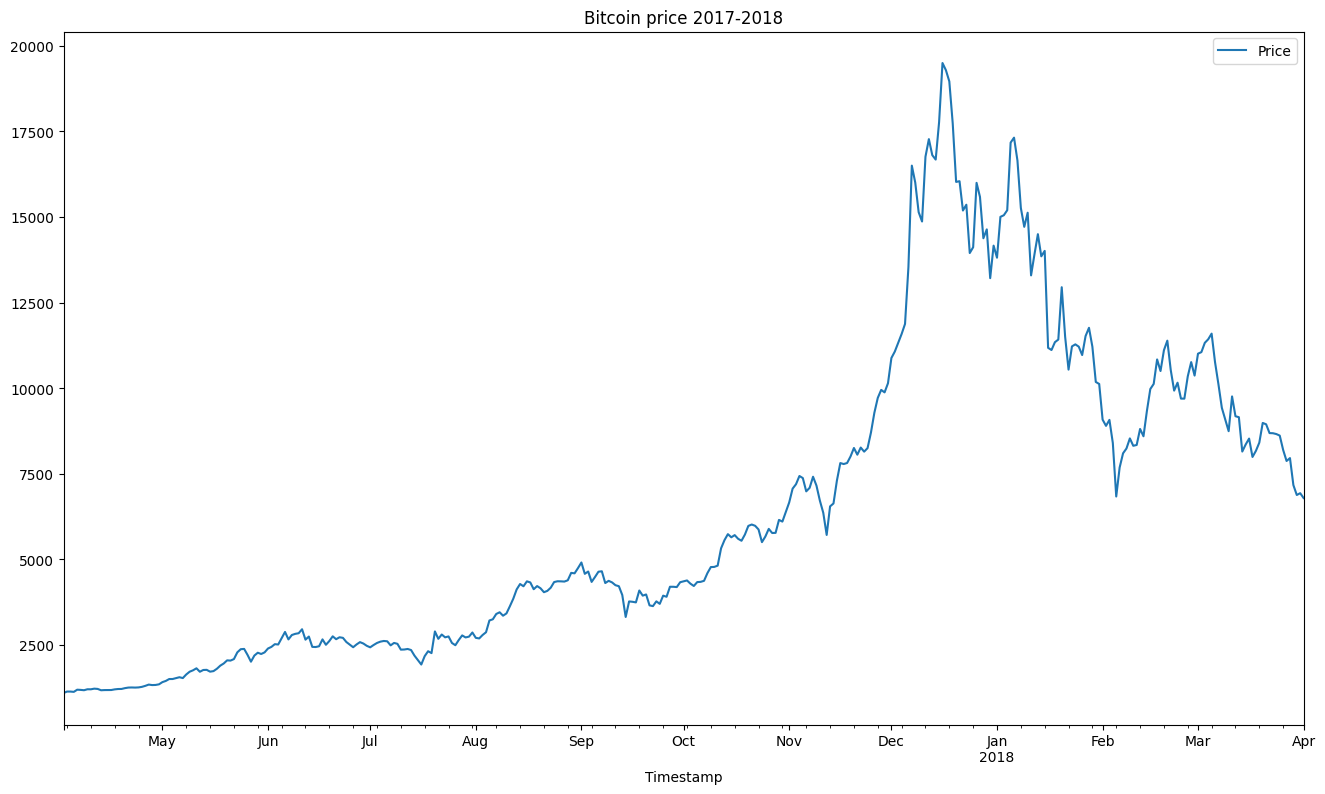

In [127]:
df.plot(figsize=(16, 9), title="Bitcoin price 2017-2018")

## Uma análise mais desafiadora

Para demonstrar a plotagem de duas colunas juntas, tentaremos adicionar preços de Ether ao nosso DataFrame `df`. Os dados de preços da ETH podem ser encontrados no arquivo `data/eth-price.csv`. O problema é que parece que aquele arquivo CSV foi criado por alguém que realmente odiava programadores. Dê uma olhada e veja como parece feio. Ainda usaremos `pandas` para analisá-lo.

In [128]:
eth = pd.read_csv('../dados/eth-price.csv')
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


Como você pode ver, ele possui uma coluna `Value` (que representa o preço), uma `Date(UTC)` que possui uma string representando datas e também uma data `UnixTimeStamp` que representa a data e hora no formato unix timestamp. O cabeçalho é lido automaticamente, vamos tentar analisar as datas com o CSV Reader:

In [129]:
eth = pd.read_csv('../dados/eth-price.csv', parse_dates= True)

print(eth.dtypes)

eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


Parece que o atributo `parse_dates` não funcionou. Precisaremos adicionar um pouco mais de personalização. Vamos dividir esse problema e focar primeiro no problema de "análise de data". A opção mais simples seria usar a coluna `UnixTimeStamp`. O módulo `pandas` possui uma função `to_datetime` que converte carimbos de data/hora Unix em objetos Datetime automaticamente:

In [130]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

O problema é a precisão dos carimbos de data/hora unix. Para combinar ambas as colunas precisaremos usar o mesmo índice e, nosso `df` contendo preços de Bitcoin, é "por dia":

Poderíamos remover a precisão de `UnixTimeStamp` ou tentar analisar a `Data (UTC)`. Vamos analisar String de `Date(UTC)` para nos divertir:

In [131]:
pd.to_datetime(eth['Date(UTC)']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

Isso parece funcionar bem! Por que não está analisando a coluna `Date (UTC)`? Simples, o parâmetro `parse_dates=True` instruirá o pandas a analisar o índice do `DataFrame`. Se quiser analisar qualquer outra coluna, você deve passar explicitamente a posição ou o nome da coluna:

In [142]:
pd.read_csv('../dados/eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


Juntando tudo novamente:

In [143]:
eth = pd.read_csv('../dados/eth-price.csv', parse_dates=[0], index_col=0)
print(eth.info())
eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


Agora podemos combinar os dois `DataFrame`s em um. Ambos têm o mesmo índice, portanto será fácil alinhar os dois preços. Vamos primeiro criar um `DataFrame` vazio e com o índice de preços do Bitcoin:

In [144]:
prices = pd.DataFrame(index= df.index)

In [145]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


E agora podemos apenas definir colunas dos outros `DataFrame`s:

In [146]:
prices['Bitcoin'] = df['Price']

In [147]:
prices['Ether'] = eth['Value']

In [148]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


Agora podemos tentar traçar ambos os valores:

<Axes: xlabel='Timestamp'>

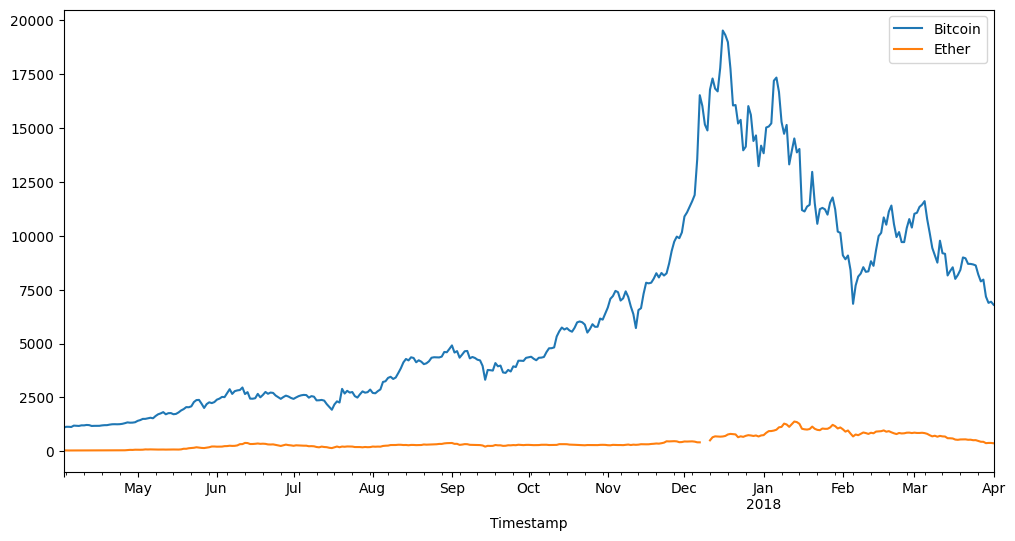

In [149]:
prices.plot(figsize=(12,6))

🤔parece que há uma pequena lacuna entre dezembro de 2017 e janeiro de 2018. Vamos ampliar:

<Axes: xlabel='Timestamp'>

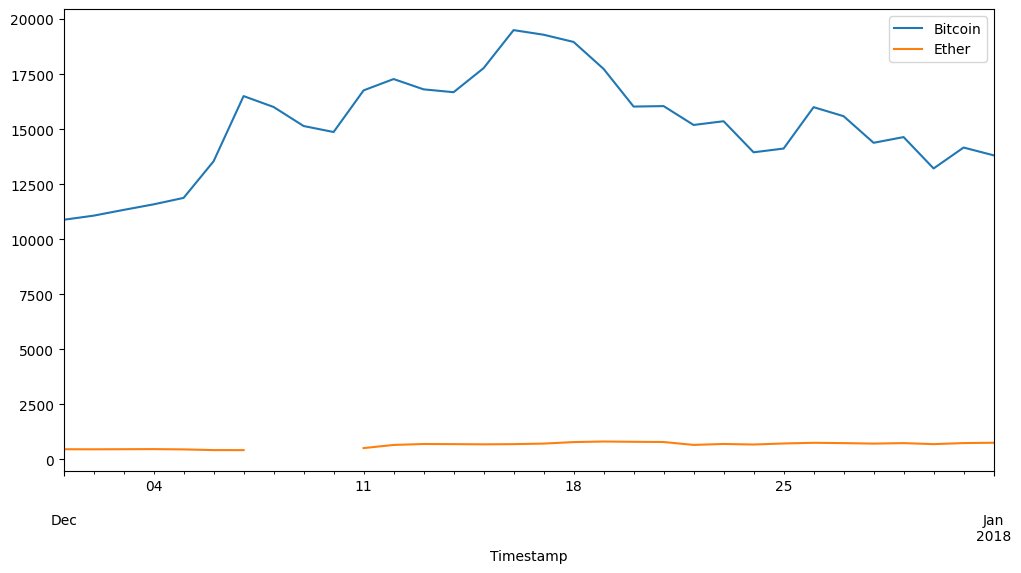

In [150]:
prices.loc['2017-12-01': '2018-01-01'].plot(figsize=(12,6))

Ah não, faltam dados 😱. Aprenderemos como lidar com isso mais tarde 😉.

A propósito, você notou aquela indexação sofisticada `'2017-12-01':'2018-01-01'` 😏. Esse é o poder dos pandas 💪. Aprenderemos como lidar com TimeSeries mais tarde também.

### Agora um exercicio de leitura de arquivo. 

#### Faça a leitura do arquivo `movies.csv`

column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']

1. Qual o filme com o maior lucro?
2. Qual o filme que deu o maior prejuízo
3. Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)
4. Uma plotagem do genero do filme. 
5. Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)
6. Qual o Genero mais popular e menos popular?
7. Existe relação entre os melhores filme e seu Budget?
8. Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
9. Mostre num gráfico a quantidade de filmes ao passar do ano

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definição dos nomes das colunas
column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration', 
                'gross', 'movie_title', 'num_user_for_reviews', 'country', 'content_rating', 
                'budget', 'title_year', 'imdb_score', 'genre']

# Leitura do arquivo CSV com os nomes de colunas especificados e ajuste no separador se necessário
movies = pd.read_csv(r"C:\Users\EstudioFace Ipanema\movies.csv", sep=';', names=column_names, header=None)
movies.head()

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,genre
0,Color|James Cameron|723.0|178.0|760505847.0|Av...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Color|Gore Verbinski|302.0|169.0|309404152.0|P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Color|Sam Mendes|602.0|148.0|200074175.0|Spect...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Color|Christopher Nolan|813.0|164.0|448130642....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,?|Doug Walker|?|?|?|Star Wars: Episode VII - T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
movies.head()

,"Color|James Cameron|723.0|178.0|760505847.0|Avatar |3054.0|USA|PG-13|237,000,000.0|2009.0|7.9|Action"
0,Color|Gore Verbinski|302.0|169.0|309404152.0|P...
1,Color|Sam Mendes|602.0|148.0|200074175.0|Spect...
2,Color|Christopher Nolan|813.0|164.0|448130642....
3,?|Doug Walker|?|?|?|Star Wars: Episode VII - T...
4,Color|Andrew Stanton|462.0|132.0|73058679.0|Jo...
